In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
meteo_file_path = 'donnee_trie_t1.csv'
meteo_data = pd.read_csv(meteo_file_path, sep=";")
meteo_data.describe()

,7005,11.730743,15.700000,3.400000
count,60.000000,60.000000,60.000000,60.000000
mean,28989.266667,19.631243,24.746667,6.021667
std,31301.761802,15.735064,7.596887,11.874829
min,7015.000000,-10.855515,0.100000,-14.500000
25%,7235.500000,12.217435,20.350000,-1.725000
50%,7599.000000,14.704762,25.950001,1.250000
75%,61984.000000,26.083992,30.324999,17.450000
max,89642.000000,111.836746,37.000000,29.400000


In [2]:
df = pd.DataFrame(meteo_data)
df.columns = ['ID', "temperature", "ordonnee", "abscisse", "date"]
df


,ID,temperature,ordonnee,abscisse,date
0,7015,11.453412,17.700001,1.300000,2010-01-05T16:00:00+01:00
1,7020,59.506989,19.299999,3.900000,2010-01-05T19:00:00+01:00
2,7027,12.122252,24.700001,0.400000,2010-01-05T13:00:00+01:00
3,7037,14.524557,26.200001,4.500000,2010-02-27T07:00:00+01:00
4,7072,11.732533,18.900000,-3.100000,2013-03-05T16:00:00+01:00
5,7110,13.226682,25.600000,1.200000,2010-01-05T13:00:00+01:00
6,7117,15.402612,17.200001,0.800000,2010-01-06T07:00:00+01:00
7,7130,12.917733,15.700000,-4.400000,2010-01-05T01:00:00+01:00
8,7139,12.114246,23.700001,3.700000,2010-02-25T10:00:00+01:00
9,7149,12.418081,20.500000,-0.700000,2010-01-05T16:00:00+01:00


# Affichage data

['ID', 'temperature', 'ordonnee', 'abscisse', 'date']


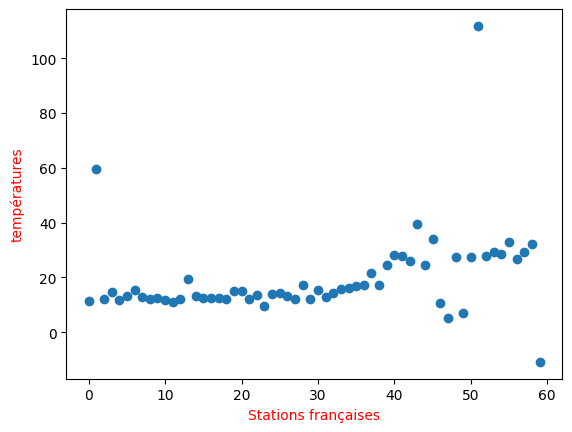

In [7]:
meteo_features = [data for data in meteo_data.columns]
print(meteo_features)
x = np.arange(60)
x = x.reshape(60,-1)
y = meteo_data['temperature'].values
plt.xlabel("Stations françaises", color= "red")
plt.ylabel("températures", color= "red")
plt.scatter(x,y)

# Régression linéaire à partir du module SKlearn

In [4]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

Coeff R2= 9.368423675879278


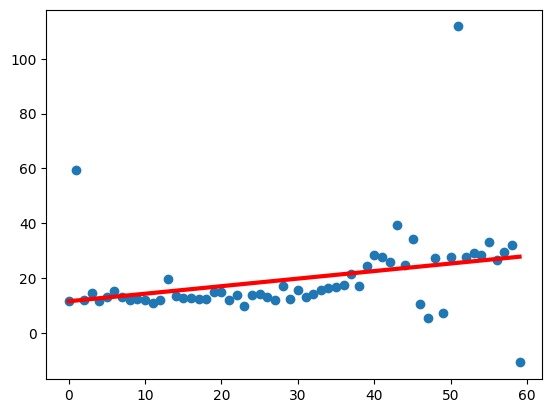

In [5]:
print('Coeff R2=', model.score(x,y)*100)
plt.xlabel("Stations françaises", color= "red")
plt.ylabel("températures", color= "red")
plt.scatter(x,y)
plt.plot(x[:,0], model.predict(x), c='red', lw=3)
